## Regularization

In [61]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [62]:
samples = 100
features = 45
informative = 15
noise = 50

X, y = make_regression( n_samples=samples, 
                        n_features=features, 
                        n_informative=informative,
                        random_state=0, 
                        noise=noise) 

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, 
                                            test_size=0.2, random_state=0)

In [63]:
def plot_curves(alphas, train, test, coefs):
    
    fig, ax = plt.subplots(2,1, figsize=(10,8), sharex=True)
    
    ax[0].plot(alphas, train, label='train')
    ax[0].plot(alphas, test, label='test')
    ax[0].set_xscale('log')
    ax[0].set_ylabel('model.score()')
    ax[0].legend()

    ax[1].plot(alphas, coefs)
    ax[1].set_xscale('log')
    ax[1].set_xlabel('alpha value')
    ax[1].set_ylabel('model.coef_')
    ax[1].legend()
    
    fig.show() 

In [64]:
def plot_results(model):
    tests = []
    n_alphas = 200
    alphas = np.logspace(-2, 3, n_alphas)

    coefs = []
    train = []
    test = []
    for a in alphas:    
        model.set_params(alpha=a)
        model.fit(X_train, y_train)
        coefs.append(model.coef_)
        test.append(model.score(X_test, y_test))
        train.append(model.score(X_train, y_train))

    plot_curves(alphas, train, test, coefs)

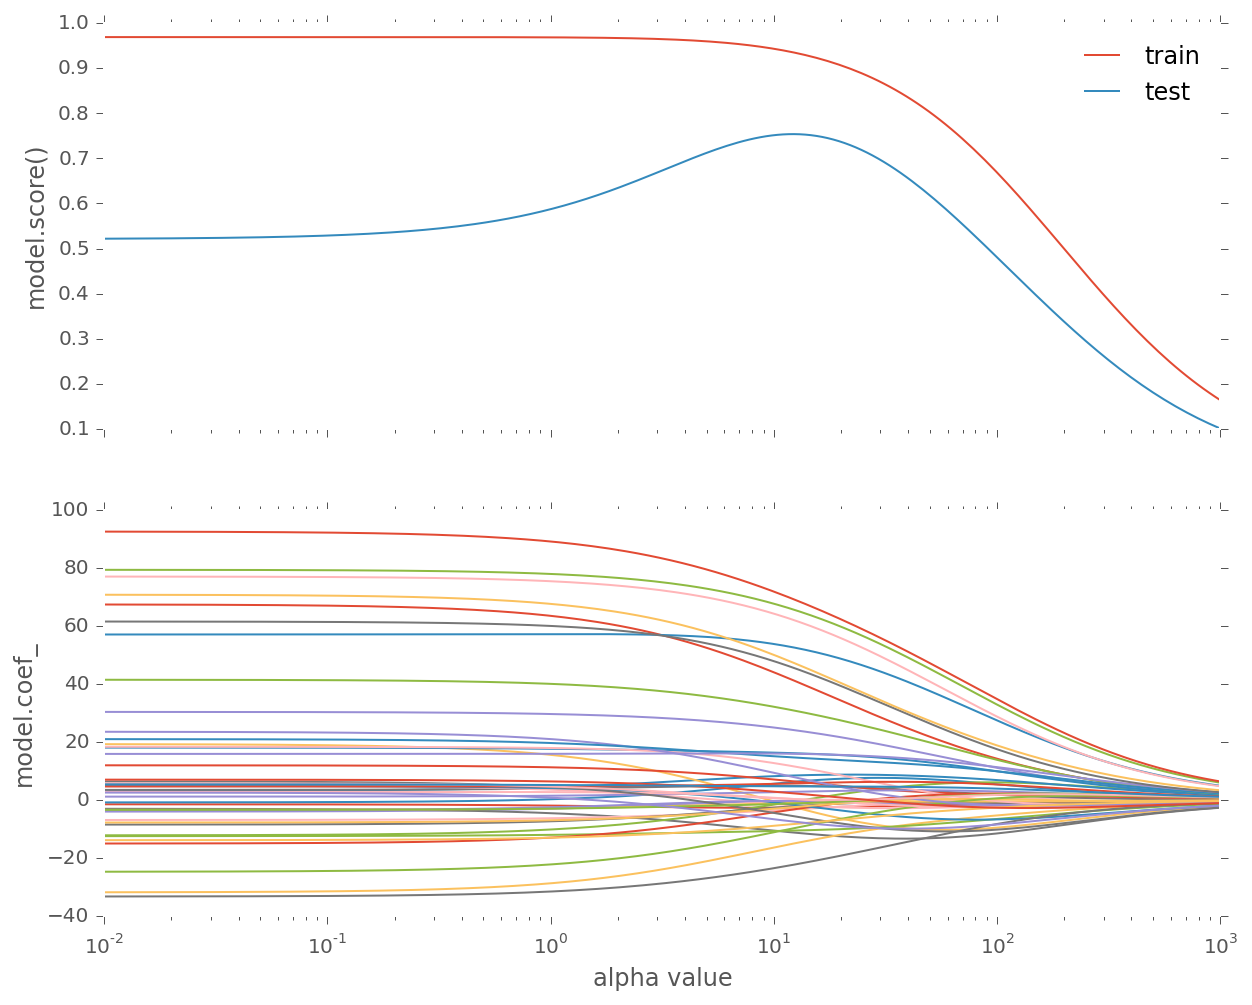

In [65]:
model = Ridge()
plot_results(model)

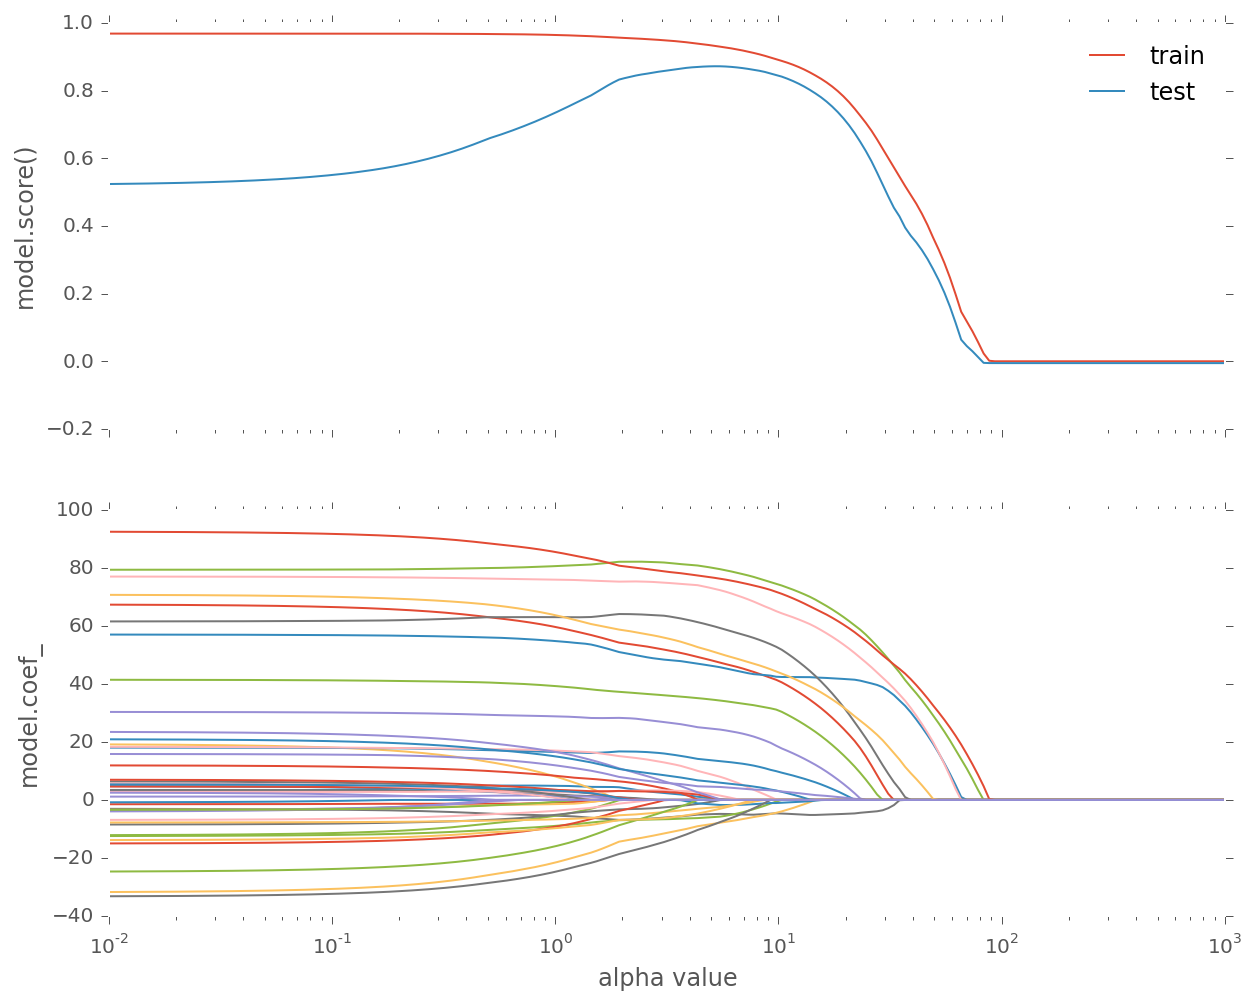

In [66]:
model = Lasso()
plot_results(model)

## Clustering Regularization

In [67]:
from sklearn.datasets import make_circles
from sklearn.neighbors import KNeighborsClassifier

In [68]:
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

def plot_classify(index):
    
    clf = KNeighborsClassifier(index)
    clf.fit(X, y)
    h = 50
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, h),
                         np.linspace(y_min, y_max, h))

    clf.fit(X, y)
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.25, cmap=plt.cm.Greys)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=70, alpha=0.75, edgecolor='none')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('X[:,0]')
    ax.set_ylabel('X[:,1]')
    

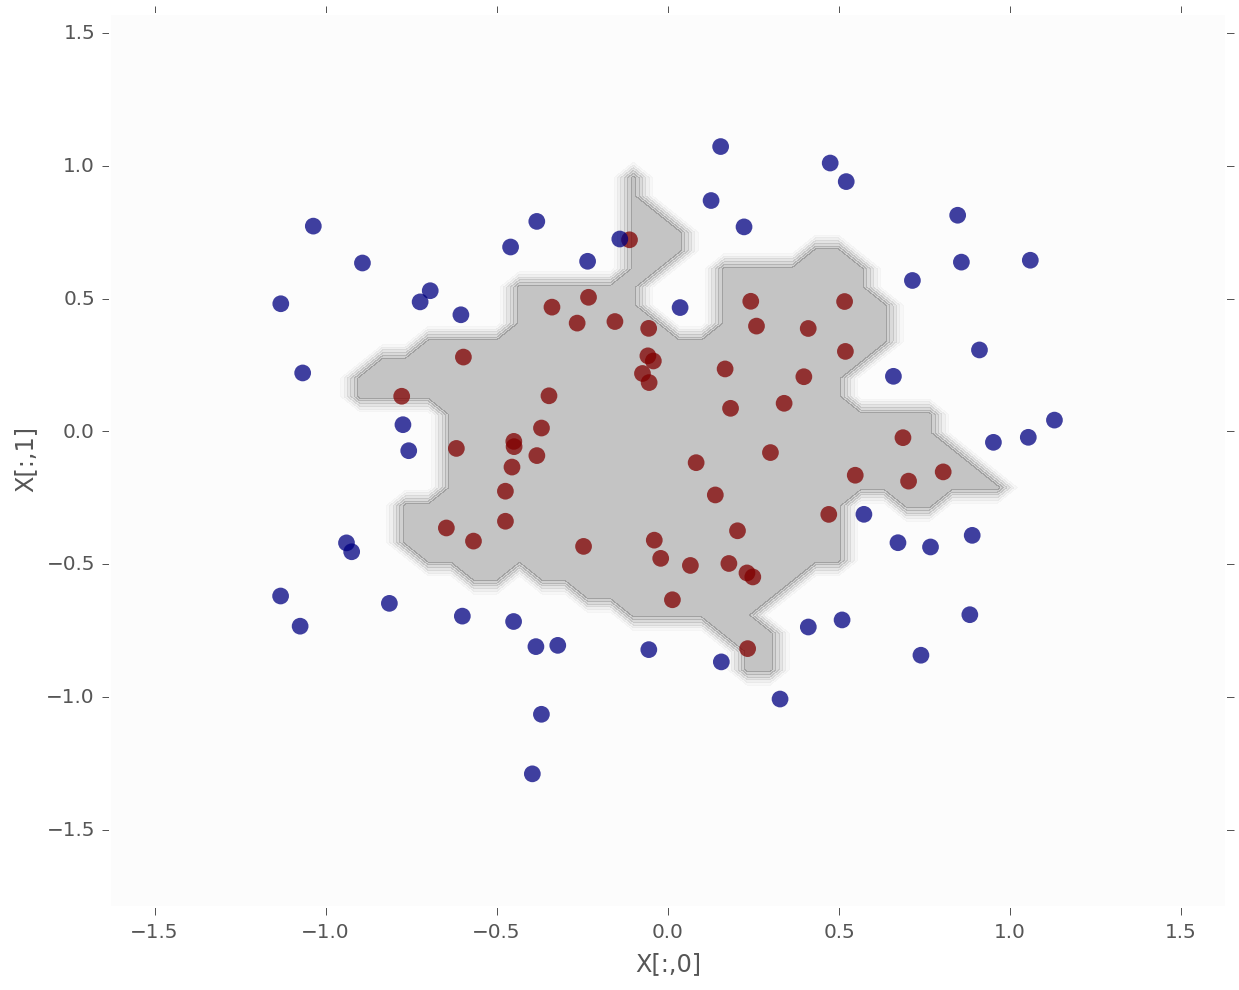

In [70]:
plot_classify(1)

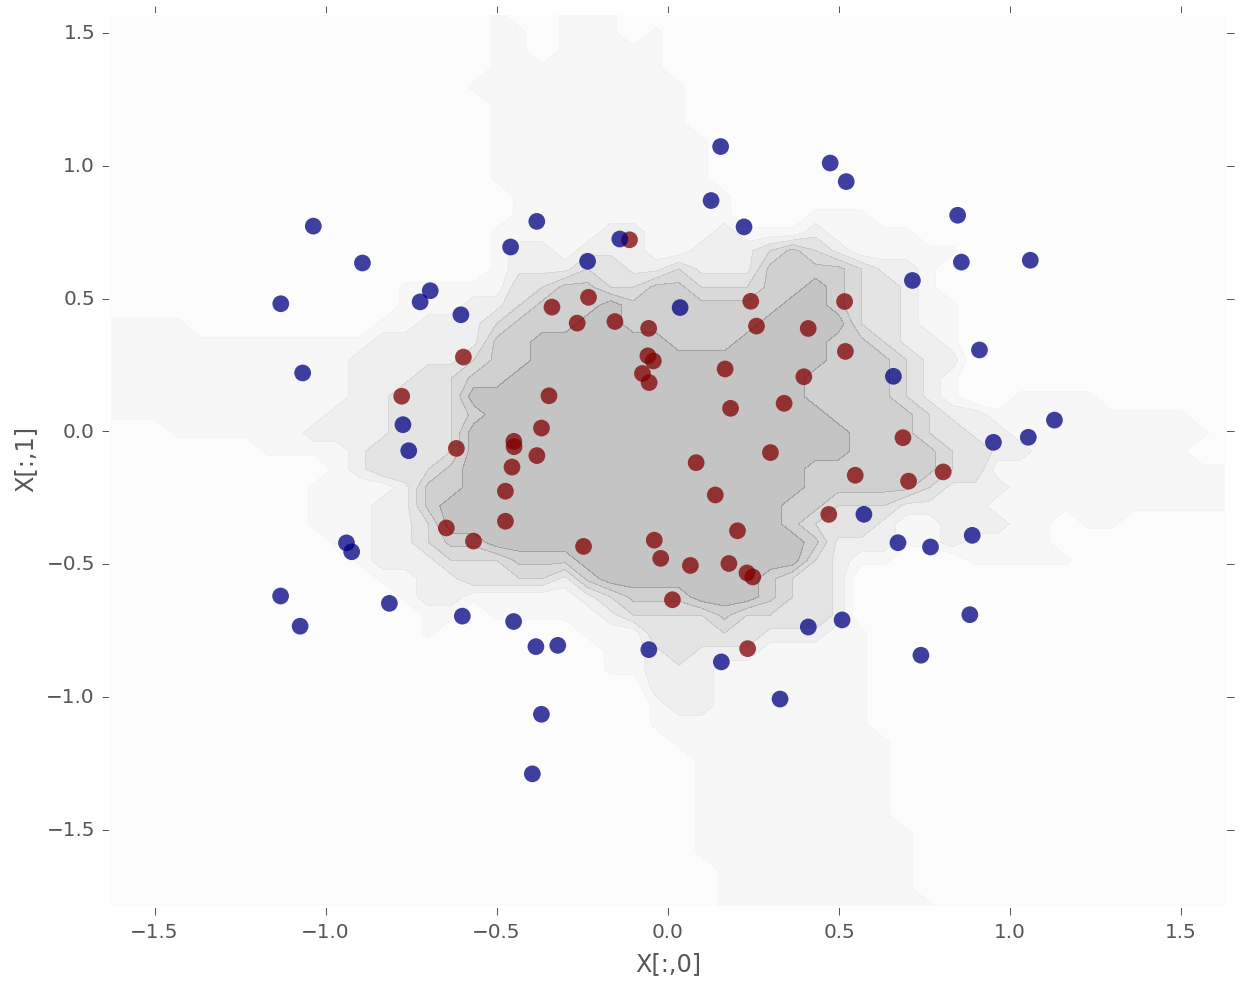

In [71]:
plot_classify(5)

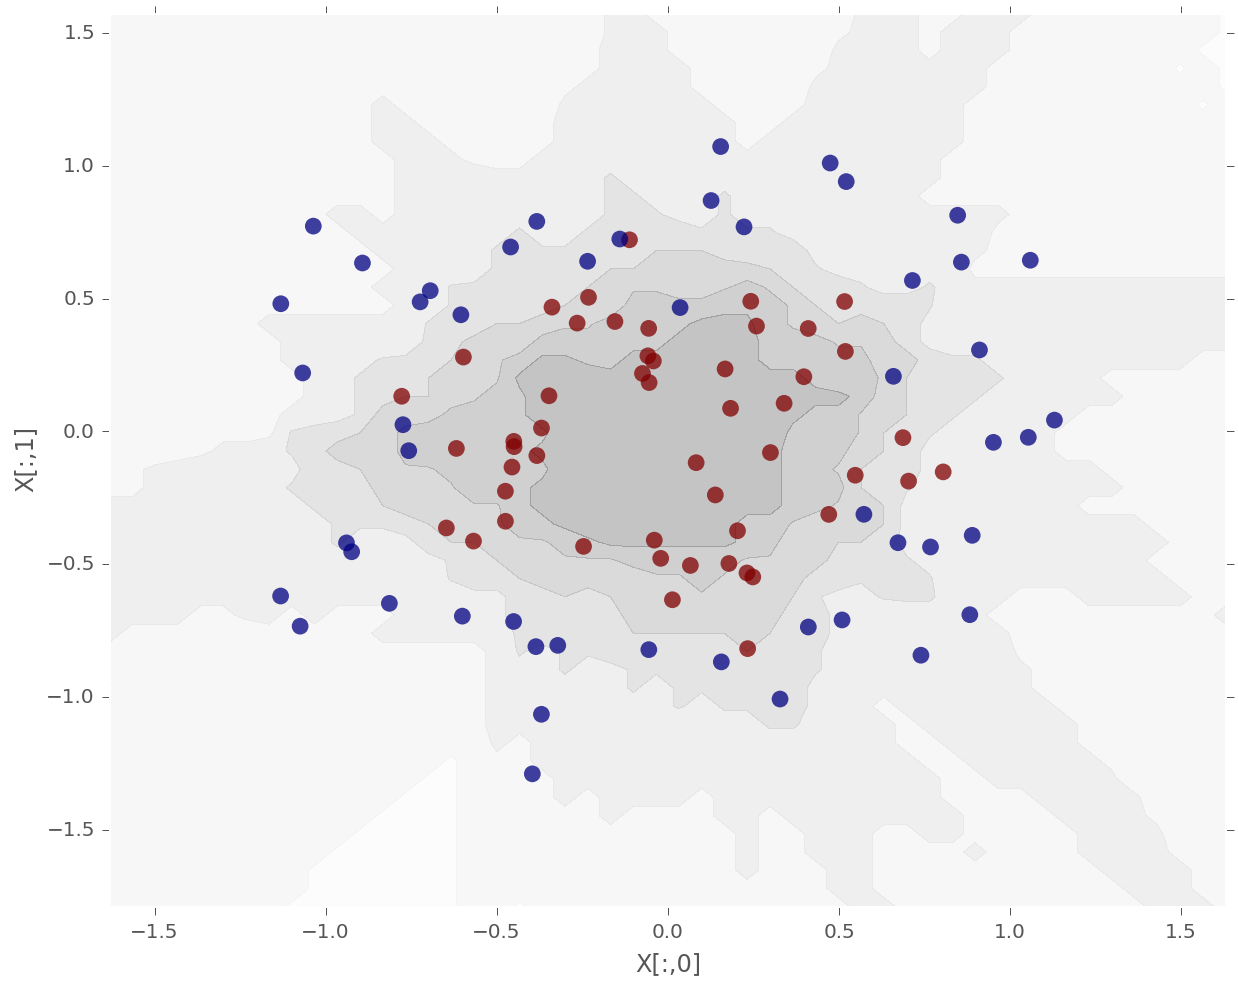

In [72]:
plot_classify(15)